In [ ]:
!gdown --id 1bRJwYIWfP5Lz4F9MvcT9vh97UiFz21mt

Downloading...
From: https://drive.google.com/uc?id=1bRJwYIWfP5Lz4F9MvcT9vh97UiFz21mt
To: /content/Iris.csv
100% 4.01k/4.01k [00:00<00:00, 11.4MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('Iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df = df.sample(150).reset_index(drop=True)

x = df.drop('species', axis=1)
y = df.species

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.6,1.4,0.2,setosa
1,5.1,3.8,1.9,0.4,setosa
2,6.9,3.1,5.4,2.1,virginica
3,5.2,3.5,1.5,0.2,setosa
4,6.3,2.8,5.1,1.5,virginica
...,...,...,...,...,...
145,6.9,3.2,5.7,2.3,virginica
146,6.1,2.6,5.6,1.4,virginica
147,5.0,2.3,3.3,1.0,versicolor
148,5.4,3.4,1.5,0.4,setosa


In [ ]:
# testing - traning
fold1 = (df.iloc[0:50].reset_index(drop=True), df.iloc[50:150].reset_index(drop=True))
fold2 = (df.iloc[50:100].reset_index(drop=True), pd.concat([df.iloc[0:50], df.iloc[100:150]]).reset_index(drop=True))
fold3 = (df.iloc[100:150].reset_index(drop=True), df.iloc[0:100].reset_index(drop=True))

In [ ]:
def manhattan(a,b):
  return abs(a-b).sum()

In [ ]:
manhattan(x.iloc[0], x.iloc[1])

0.9999999999999993

In [ ]:
# rumus normalisasi agar isi datanya diantara 0-1 saja
X = (x - x.min()) / (x.max() - x.min())
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
def predict(x, k, X, y):
  distance = []
  for _,row in X.iterrows():
    distance.append(manhattan(x,row))

  data = X.copy()
  data['dist'] = distance
  data['clas'] = y
  data = data.sort_values(by='dist').reset_index(drop=True)

  y_predict = data.iloc[:k].clas.mode()
  
  return y_predict[0]

In [ ]:
def akurasi(y_pred, y_true):
  n = len(y_pred)
  benar= 0
  for i in range(n):
    if y_pred[i] == y_true[i]:
      benar += 1
  
  return 100 * benar / n

In [ ]:
akurasi(y,y)

100.0

In [ ]:
for k in [1,3,5]:
  acc = []

  for fold in [fold1, fold2, fold3]:
    test, train = fold

    X_train, y_train = train.drop('species', axis=1), train.species
    X_test, y_test = test.drop('species', axis=1), test.species

    y_preds = []
    for _, x in X_test.iterrows():
      y_preds.append(predict(x,k,X_train, y_train))

    acc.append(akurasi(y_preds, y_test))

  print(f'Dengan k = {k}, rata-rata akurasi = {sum(acc)/3} %')

Dengan k = 1, rata-rata akurasi = 94.66666666666667 %
Dengan k = 3, rata-rata akurasi = 94.66666666666667 %
Dengan k = 5, rata-rata akurasi = 94.66666666666667 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2e5714d0>,
      dtype=object)

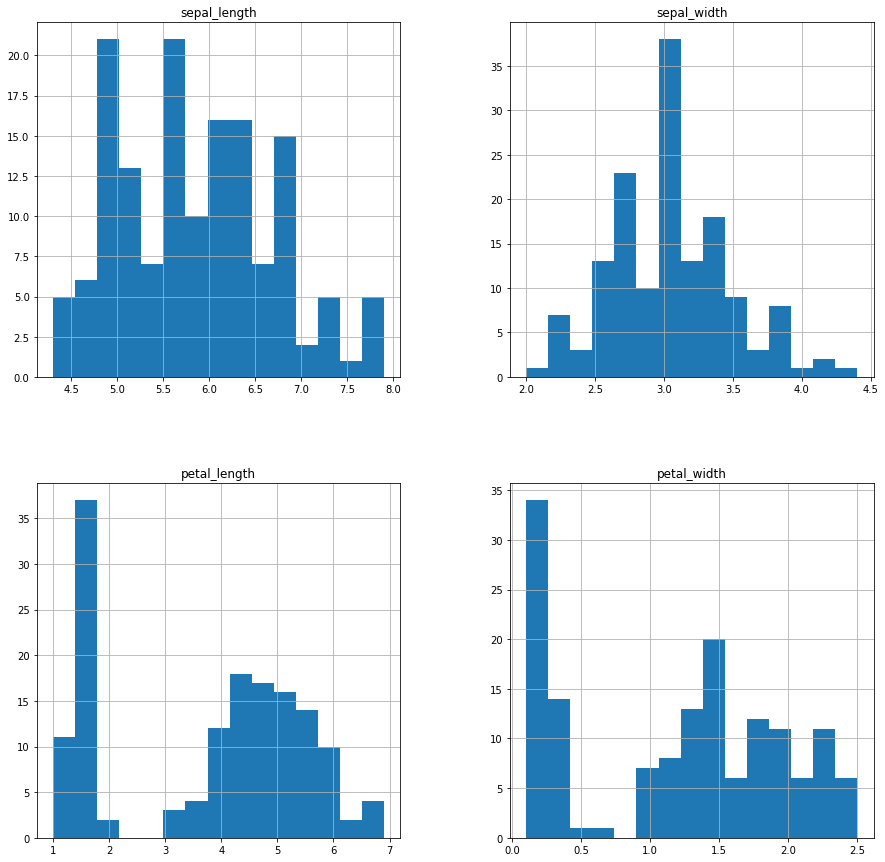

In [ ]:
df.hist(figsize=(15,15), bins=15)

# NAIVE BAYES


In [ ]:
import pandas as pd

df = pd.read_csv('Iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df['species'] = df.species.replace({
    'setosa' : 0,
    'versicolor' : 1,
    'virginica' : 2
})

In [ ]:
df = df.sample(150).reset_index(drop=True)

x = df.drop('species', axis=1)
y = df.species

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,2.4,3.8,1.1,1
1,6.5,3.0,5.5,1.8,2
2,7.9,3.8,6.4,2.0,2
3,5.1,2.5,3.0,1.1,1
4,5.9,3.2,4.8,1.8,1
...,...,...,...,...,...
145,6.6,3.0,4.4,1.4,1
146,5.4,3.4,1.5,0.4,0
147,6.4,2.8,5.6,2.1,2
148,5.0,2.0,3.5,1.0,1


In [ ]:
# testing - traning
fold1 = (df.iloc[0:50].reset_index(drop=True), df.iloc[50:150].reset_index(drop=True))
fold2 = (df.iloc[50:100].reset_index(drop=True), pd.concat([df.iloc[0:50], df.iloc[100:150]]).reset_index(drop=True))
fold3 = (df.iloc[100:150].reset_index(drop=True), df.iloc[0:100].reset_index(drop=True))

In [ ]:
df.head().species

0    1
1    2
2    2
3    1
4    1
Name: species, dtype: int64

In [ ]:
def split_by_class(df):
    splitted_df = {}
    for kelas in df.species.unique():
      splitted_df[kelas] = df[df.species == kelas].reset_index(drop=True)
    return splitted_df

split_by_class(df)[0].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.4,1.7,0.2,0
1,5.1,3.3,1.7,0.5,0
2,5.7,4.4,1.5,0.4,0
3,5.0,3.3,1.4,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
def summarize_dataset(df):
  return df.describe().loc[['mean', 'std', 'count']]

summarize_dataset(df)

,sepal_length,sepal_width,petal_length,petal_width,species
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
count,150.000000,150.000000,150.000000,150.000000,150.000000


In [ ]:
def summarize_by_class(df):
  separated = split_by_class(df)
  summaries = {}
  for kelas in separated:
    summaries[kelas] = summarize_dataset(separated[kelas])
  return summaries

summarize_by_class(df)

{0:        sepal_length  sepal_width  petal_length  petal_width  species
 mean        5.00600     3.418000      1.464000      0.24400      0.0
 std         0.35249     0.381024      0.173511      0.10721      0.0
 count      50.00000    50.000000     50.000000     50.00000     50.0,
 1:        sepal_length  sepal_width  petal_length  petal_width  species
 mean       5.936000     2.770000      4.260000     1.326000      1.0
 std        0.516171     0.313798      0.469911     0.197753      0.0
 count     50.000000    50.000000     50.000000    50.000000     50.0,
 2:        sepal_length  sepal_width  petal_length  petal_width  species
 mean        6.58800     2.974000      5.552000      2.02600      2.0
 std         0.63588     0.322497      0.551895      0.27465      0.0
 count      50.00000    50.000000     50.000000     50.00000     50.0}

In [ ]:
import math

def gaussian(x, mean, std):
  exponent = math.exp(-((x-mean)**2 / (2*std**2)))
  return (1/(math.sqrt(2* math.pi)*std)) * exponent

gaussian(1,1,1)

0.3989422804014327

In [ ]:
def calculate_class_probabilities(x, summaries):
  n = sum([summaries[kelas].loc['count'].species for kelas in summaries])
  probs = {}
  for kelas in summaries:
    probs[kelas] = summaries[kelas].loc['count'].species / n
    for col in summaries[kelas].columns[:-1]:
      mean, std, count = summaries[kelas][col]
      probs[kelas] *= gaussian(x[col], mean, std)

  return probs

summaries = summarize_by_class(df)
calculate_class_probabilities(df.iloc[0], summaries)

{0: 2.239007535818694e-55, 1: 0.06315568957135458, 2: 2.842106801318592e-07}

In [ ]:
def predictBayes(train, test):
  preds = []
  summaries = summarize_by_class(train)
  
  for _, row in test.iterrows():
    probs = calculate_class_probabilities(row, summaries)
    preds.append(max(probs, key =probs.get))
  return preds

In [ ]:
acc = []

for fold in [fold1, fold2, fold3]:

  test, train = fold
  y_test = test.species

  y_preds = predictBayes(train, test)

  acc.append(akurasi(y_preds, y_test))

print(f'rata-rata akurasi = {sum(acc) / 3:.2f}%')

rata-rata akurasi = 95.33%
